In [2]:
## Import global variables, tools, libraries and functions
import global_vars
import importlib
importlib.reload(global_vars)
execfile('global_vars.py')


In [3]:
## Run 4DEnVar experiment exp_size times for varying ensemble size
filepath = '/Users/nataliedouglas/Documents/Research/Reading University Work/ToyCarbonModel_GitHub_Final'

exp_size=20
ens_sizes=np.arange(5,50,5)
RMSEexp=np.zeros((2,exp_size,len(ens_sizes)))

for i in range(0,exp_size):
    
    rmse_anal_1 = []
    rmse_anal_2 = []
    j=0
    
    while j < len(ens_sizes):
        
        x_ens=[]
        hxbar=[]
        hX=[]
        
        GE = genensemble_class.genensemble_class(ens_sizes[j], g_xb, g_B_mat, g_val_bnds)
        x_ens=GE.ens
        
        GF = genDAfeatures_class.genDAfeatures_class(g_initstate, g_tf, g_deltat, g_forcing, x_ens)
        [hxbar,hX]=[GF.hxbar,GF.hX]
        [hxbar_mat,hX_mat]=[GF.hxbar_mat,GF.hX_mat]
        
        rmse_hxbar_1 = RMSE(hxbar_mat[0],g_xtrue_noise[0])
        rmse_hxbar_2 = RMSE(hxbar_mat[1],g_xtrue_noise[1])
        
        DA=fourDEnVar_engine.fourDEnVar_engine(x_ens, hX, g_y, g_R, hxbar)
        xa=DA.xa
        Xa=DA.Xa
        anal=DA.xa_analytical
        print(xa)
        print(anal)
        
        MR = modelruns_class.modelruns_class(g_initstate, g_tf, g_deltat, g_forcing, xa)
        hanal_mat = MR.xf
        rmse1=RMSE(hanal_mat[0],g_xtrue_noise[0])
        rmse2=RMSE(hanal_mat[1],g_xtrue_noise[1])
        
        ## DA fails if parameters fall outside permitted range or RMSE is high
        test = 1
        string = filepath+'/Failed Ensembles/failed_ensemble'
        for n in range(0,4):
            if xa[n] < g_val_bnds[n][0] or xa[n] > g_val_bnds[n][1]:
                test = 0
                string += '_'+g_xlabels[n]+'_exp'+str(i)+'_ens'+str(ens_sizes[j])
                print(g_xlabels[n]+'parameter out of bounds in exper. '+str(i)+'and ens. size '+str(ens_sizes[j]))
        if rmse1 >100 or rmse2>100:
            test=0
            string += '_highRMSE'
        
        ## output the failed ensemble if DA is considered to fail as above, append RMSE for plotting otherwise
        if test == 0:
            np.save(string+'.npy',x_ens)
        else:
            j+=1
            rmse_anal_1.append(rmse1)
            rmse_anal_2.append(rmse2)
    
    RMSEexp[0,i,:]=rmse_anal_1
    RMSEexp[1,i,:]=rmse_anal_2


shape of X_dash_b: (4, 5)
shape of Y_dash_b: (2002, 5)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.81112518 1.91339112 0.21124587 0.0872428 ]
[0.81112701 1.91338705 0.21124581 0.08724277]
shape of X_dash_b: (4, 10)
shape of Y_dash_b: (2002, 10)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[1.13938455 1.45695704 0.22632424 0.07341251]
[1.13938116 1.45687679 0.22634217 0.07341231]
shape of X_dash_b: (4, 15)
shape of Y_dash_b: (2002, 15)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.50857958 2.29156373 0.19035158 0.07771677]
[0.51553735 2.28135687 0.19004297 0.0777036 ]
shape of X_dash_b: (4, 20)
shape of Y_dash_b: (2002, 20)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.3111975  2.47707942 0.19110776 0.08908954]
[0.31103082 2.47742773 0.19110079 0.08908906]
$p_1$parameter out of bounds in exper. 0and en

shape of X_dash_b: (4, 10)
shape of Y_dash_b: (2002, 10)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[1.32956384 0.33549493 0.28049853 0.07171431]
[1.32961288 0.33549167 0.28049699 0.07171377]
$p_2$parameter out of bounds in exper. 2and ens. size 10
shape of X_dash_b: (4, 10)
shape of Y_dash_b: (2002, 10)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.10914224 2.36088219 0.21524962 0.08928376]
[0.10885064 2.36090501 0.21526956 0.08928375]
$p_1$parameter out of bounds in exper. 2and ens. size 10
shape of X_dash_b: (4, 10)
shape of Y_dash_b: (2002, 10)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.31901718 1.91873697 0.23308387 0.09244266]
[0.31821758 1.91919203 0.23309186 0.09245122]
$p_1$parameter out of bounds in exper. 2and ens. size 10
shape of X_dash_b: (4, 10)
shape of Y_dash_b: (2002, 10)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetri

Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.89365659 1.76669079 0.20079228 0.0895491 ]
[0.89332791 1.76763972 0.20079564 0.08954719]
shape of X_dash_b: (4, 40)
shape of Y_dash_b: (2002, 40)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.78513248 1.61466126 0.21061164 0.09041984]
[0.78484111 1.61459141 0.21059937 0.09043058]
shape of X_dash_b: (4, 45)
shape of Y_dash_b: (2002, 45)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.64737828 1.77747023 0.215142   0.09016618]
[0.64768707 1.77728652 0.21513732 0.09016499]
shape of X_dash_b: (4, 5)
shape of Y_dash_b: (2002, 5)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[ 1.56192385 -0.83389681  0.2366325   0.0691266 ]
[ 1.56192394 -0.83389686  0.23663248  0.0691266 ]
$p_2$parameter out of bounds in exper. 5and ens. size 5
shape of X_dash_b: (4, 5)
shape of Y_da

shape of X_dash_b: (4, 10)
shape of Y_dash_b: (2002, 10)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[1.35946806 0.85008599 0.19336539 0.07962346]
[1.3594893  0.85013235 0.19335574 0.07962123]
shape of X_dash_b: (4, 15)
shape of Y_dash_b: (2002, 15)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.7721917  1.86634985 0.21403816 0.08612791]
[0.77222024 1.86541197 0.21404052 0.08613007]
shape of X_dash_b: (4, 20)
shape of Y_dash_b: (2002, 20)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.46084636 3.08791898 0.18715328 0.07628444]
[0.46073618 3.08776406 0.18704012 0.07629583]
$p_1$parameter out of bounds in exper. 7and ens. size 20
shape of X_dash_b: (4, 20)
shape of Y_dash_b: (2002, 20)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.87589464 1.5438075  0.17634264 0.08790811]
[0.87499454 1.54650229 0.17633544

shape of X_dash_b: (4, 45)
shape of Y_dash_b: (2002, 45)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.58353768 2.11974357 0.20537691 0.08858838]
[0.58257029 2.1206296  0.20537744 0.08859448]
shape of X_dash_b: (4, 5)
shape of Y_dash_b: (2002, 5)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[1.67202222 1.6176722  0.32919686 0.07793963]
[1.67202388 1.61766604 0.32919656 0.0779398 ]
shape of X_dash_b: (4, 10)
shape of Y_dash_b: (2002, 10)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.61939919 1.59056726 0.2022206  0.09383523]
[0.61944975 1.59048563 0.20222535 0.0938366 ]
shape of X_dash_b: (4, 15)
shape of Y_dash_b: (2002, 15)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.74235385 1.60962624 0.18722739 0.08616111]
[0.74271752 1.60825858 0.18722482 0.08616452]
shape of X_dash_b: (4, 20)
shape of Y_dash_b: 

shape of X_dash_b: (4, 20)
shape of Y_dash_b: (2002, 20)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.39317893 3.06446577 0.21193449 0.07918521]
[0.39309523 3.06425983 0.21194095 0.07918831]
$p_1$parameter out of bounds in exper. 13and ens. size 20
shape of X_dash_b: (4, 20)
shape of Y_dash_b: (2002, 20)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.7428911  1.55587258 0.2193363  0.09090935]
[0.74302835 1.55591419 0.21935747 0.09090615]
shape of X_dash_b: (4, 25)
shape of Y_dash_b: (2002, 25)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.70588334 1.80879434 0.20153478 0.08745186]
[0.70622285 1.80851873 0.20153748 0.08744658]
shape of X_dash_b: (4, 30)
shape of Y_dash_b: (2002, 30)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[1.04720362 1.26343778 0.20864314 0.08635521]
[1.04737918 1.26306367 0.2086808

shape of X_dash_b: (4, 15)
shape of Y_dash_b: (2002, 15)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.10127725 1.62116454 0.21304115 0.11192275]
[0.10227367 1.62067422 0.21310496 0.11191153]
$p_1$parameter out of bounds in exper. 16and ens. size 15
shape of X_dash_b: (4, 15)
shape of Y_dash_b: (2002, 15)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.01840644 3.46681333 0.27103565 0.07023424]
[0.01673192 3.47059806 0.27090121 0.0702332 ]
$p_1$parameter out of bounds in exper. 16and ens. size 15
shape of X_dash_b: (4, 15)
shape of Y_dash_b: (2002, 15)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.98394306 1.0427779  0.26203792 0.08081149]
[0.98415071 1.04216572 0.26204142 0.08081031]
shape of X_dash_b: (4, 20)
shape of Y_dash_b: (2002, 20)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.38098952 2.626312

shape of X_dash_b: (4, 10)
shape of Y_dash_b: (2002, 10)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[1.29688114 1.08035802 0.22369228 0.07666689]
[1.29681588 1.0804766  0.22369488 0.07666724]
shape of X_dash_b: (4, 15)
shape of Y_dash_b: (2002, 15)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.26813519 2.95039906 0.21450527 0.08552459]
[0.26777297 2.95096055 0.21450646 0.08552194]
$p_1$parameter out of bounds in exper. 19and ens. size 15
shape of X_dash_b: (4, 15)
shape of Y_dash_b: (2002, 15)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.96100004 1.30853457 0.2894964  0.08317409]
[0.96098445 1.30875217 0.28949906 0.08317351]
shape of X_dash_b: (4, 20)
shape of Y_dash_b: (2002, 20)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[0.43131682 2.65616906 0.2031443  0.0899424 ]
[0.43100761 2.65588092 0.2031641

Text(0, 0.5, 'RMSE')

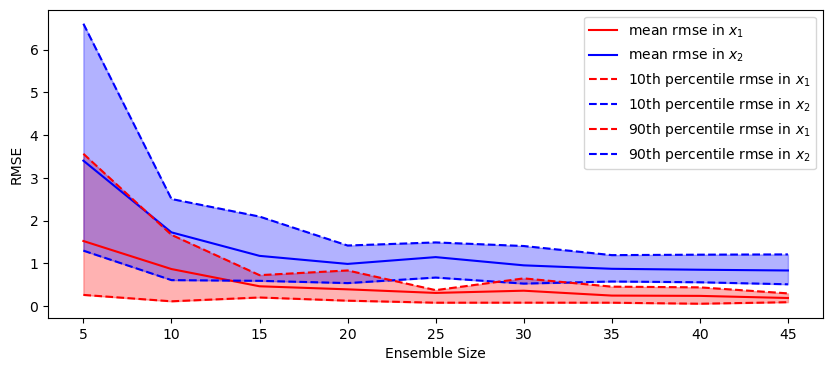

In [4]:
## Plot mean, 10th and 90th percentiles for RMSE against ensemble size

RMSE1_mean=np.mean(RMSEexp[0,:,:],0) 
RMSE2_mean=np.mean(RMSEexp[1,:,:],0) 
RMSE1_10=np.percentile(RMSEexp[0,:,:],10,axis=0)
RMSE2_10=np.percentile(RMSEexp[1,:,:],10,axis=0)
RMSE1_90=np.percentile(RMSEexp[0,:,:],90,axis=0)
RMSE2_90=np.percentile(RMSEexp[1,:,:],90,axis=0)
plt.figure(figsize=(10,4))
plt.plot(ens_sizes,RMSE1_mean,label=r'mean rmse in $x_1$',color='r')
plt.plot(ens_sizes,RMSE2_mean,label=r'mean rmse in $x_2$',color='b')
plt.plot(ens_sizes,RMSE1_10,label=r'10th percentile rmse in $x_1$',color='r', linestyle='dashed')
plt.plot(ens_sizes,RMSE2_10,label=r'10th percentile rmse in $x_2$',color='b', linestyle='dashed')
plt.plot(ens_sizes,RMSE1_90,label=r'90th percentile rmse in $x_1$',color='r', linestyle='dashed')
plt.plot(ens_sizes,RMSE2_90,label=r'90th percentile rmse in $x_2$',color='b', linestyle='dashed')
plt.fill_between(ens_sizes,RMSE1_90,RMSE1_10, color='r',alpha=0.3)
plt.fill_between(ens_sizes,RMSE2_90,RMSE2_10, color='b', alpha=0.3)
plt.legend()
plt.xlabel('Ensemble Size')
plt.ylabel('RMSE')